In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.cluster import KMeans

In [47]:
data = pd.read_csv('Country_Clusters.csv')


In [48]:
data
#The lat and long coorditated have been converted to decimal here using some online converter.

,Country,Latitude,Longitude,Language
0,USA,44.97,-103.77,English
1,Canada,62.40,-96.80,English
2,France,46.75,2.40,French
3,UK,54.01,-2.53,English
4,Germany,51.15,10.40,German
5,Australia,-25.45,133.11,English


<b>Plot the data</b>


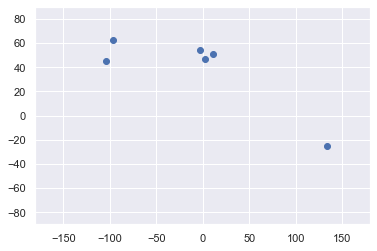

In [49]:
plt.scatter(data['Longitude'],data['Latitude'])
#Set the axis limits to represent a map
plt.xlim(-180,180)
plt.ylim(-90,90)
plt.show()

<b>Select the features</b>

In [50]:
#Clustering based on location
#DataFrame.iloc(row indices,column indices) : slices the data frame, given rows and columns to be kept
x = data.iloc[:,1:3] #Get all rows, and columns 1 and 3(index starts at 0)


In [51]:
x

,Latitude,Longitude
0,44.97,-103.77
1,62.40,-96.80
2,46.75,2.40
3,54.01,-2.53
4,51.15,10.40
5,-25.45,133.11


<b>Clustering</b>

In [52]:
kmeans = KMeans(3) #Number of clusters you want to produce

In [53]:
kmeans.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

<b>Clustering results</b>

In [54]:
#sklearn.cluster.KMeans.fit_predict(x) : returns the cluster predictions in an array.
identified_clusters = kmeans.fit_predict(x)
identified_clusters
#Here we can see that the first 5 observations are in one cluster and the last observation in another cluster.

array([1, 1, 2, 2, 2, 0])

In [55]:
data_with_clusters = data.copy()
data_with_clusters['Cluster'] = identified_clusters 
data_with_clusters

,Country,Latitude,Longitude,Language,Cluster
0,USA,44.97,-103.77,English,1
1,Canada,62.40,-96.80,English,1
2,France,46.75,2.40,French,2
3,UK,54.01,-2.53,English,2
4,Germany,51.15,10.40,German,2
5,Australia,-25.45,133.11,English,0


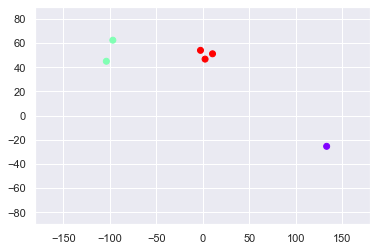

In [56]:
plt.scatter(data_with_clusters['Longitude'],data_with_clusters['Latitude'],c=data_with_clusters.Cluster,cmap='rainbow')
#Set the axis limits to represent a map
plt.xlim(-180,180)
plt.ylim(-90,90)
plt.show()

<b>Clustering Categorical Data</b>

In [58]:
#Map the data:
data_mapped = data.copy()
#Note that this is not the optimal way to encode them but it will work for now.
data_mapped.Language = data_mapped.Language.map({'English':2,'French':1,'German':0})
data_mapped

,Country,Latitude,Longitude,Language
0,USA,44.97,-103.77,2
1,Canada,62.40,-96.80,2
2,France,46.75,2.40,1
3,UK,54.01,-2.53,2
4,Germany,51.15,10.40,0
5,Australia,-25.45,133.11,2


In [59]:
#Select the features:
x = data_mapped.iloc[:,1:4]

In [60]:
# x = x.values.reshape(-1,1)

<b>Clustering</b>

In [90]:
kmeans = KMeans(2)
kmeans.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [91]:
identified_clusters = kmeans.fit_predict(x)


In [92]:
identified_clusters

array([0, 0, 0, 0, 0, 1])

In [93]:
identified_clusters_df = data.copy()

In [94]:
identified_clusters_df['Cluster'] = identified_clusters


In [95]:
identified_clusters_df

,Country,Latitude,Longitude,Language,Cluster
0,USA,44.97,-103.77,English,0
1,Canada,62.40,-96.80,English,0
2,France,46.75,2.40,French,0
3,UK,54.01,-2.53,English,0
4,Germany,51.15,10.40,German,0
5,Australia,-25.45,133.11,English,1


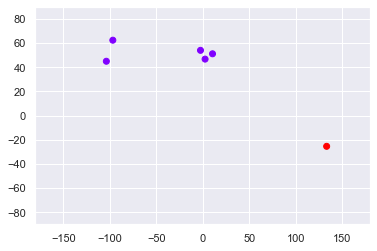

In [96]:
plt.scatter(identified_clusters_df['Longitude'],identified_clusters_df['Latitude'],c=identified_clusters_df.Cluster,cmap='rainbow')
#Set the axis limits to represent a map
plt.xlim(-180,180)
plt.ylim(-90,90)
plt.show()

<b>Selcting the number of clusters</b>

In [97]:
#WCSS
kmeans.inertia_

13208.95812

In [99]:
wcss = []

#Function for obtaining wcss elbow chart
for i in range(1,7):
    kmeans = KMeans(i)
    kmeans.fit(x)
    wcss_iter = kmeans.inertia_
    wcss.append(wcss_iter)


In [100]:
wcss
#Contains within -

[42605.41356666667,
 13208.95812,
 290.10523333333333,
 113.91233333333332,
 39.00624999999998,
 0.0]

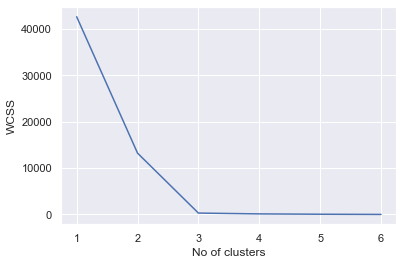

In [103]:
plt.plot(list(range(1,7)),wcss)
plt.xlabel("No of clusters")
plt.ylabel("WCSS")
plt.show()
#According to this graph a 3 cluster solution would be best one as after it there is not much to gain.
#A 2 cluster solution in this case would be suboptimal as the leap of WCSS from 2 to 3 is very big